# Clustering

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [3]:
import pandas as pd
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Remove protiens missing 10 or more measurements.

In [4]:
df2 = df.loc[:, df.isnull().sum() <= 10]
df2 = df2.dropna()

df.shape, df2.shape

((1080, 82), (1073, 74))

Get numeric labels for categorical data.

In [6]:
behaviorLabels, behaviors = pd.factorize(df2['Behavior'])
behaviorLabels, behaviors

(array([0, 0, 0, ..., 1, 1, 1]), Index(['C/S', 'S/C'], dtype='object'))

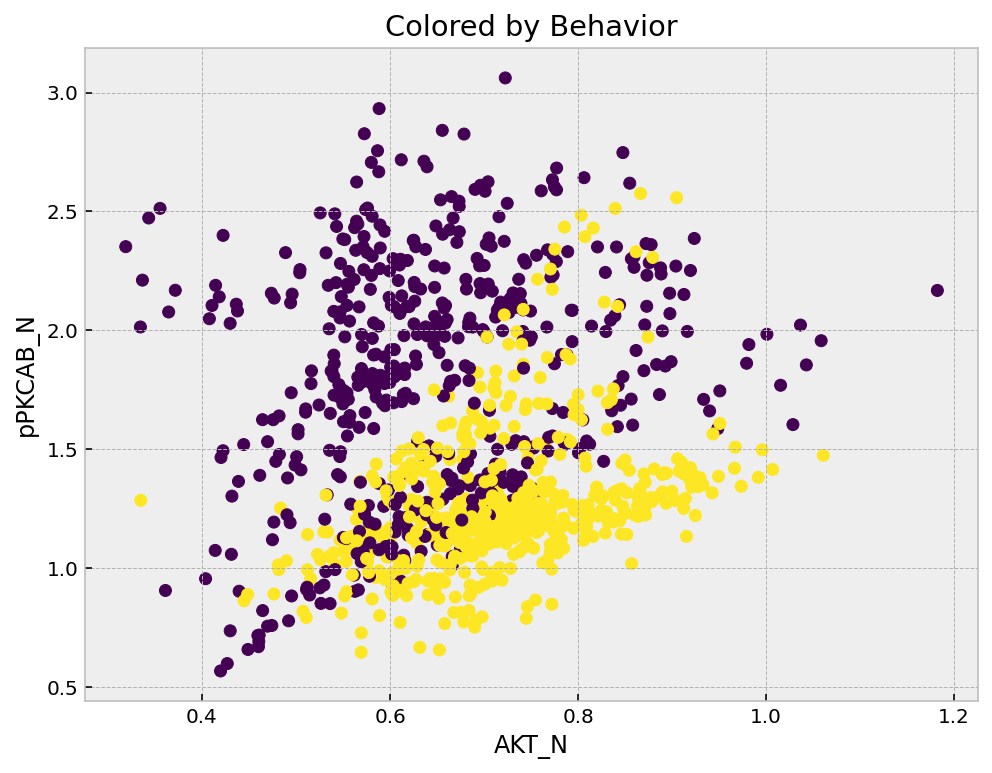

In [12]:
plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=behaviorLabels)
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('Colored by Behavior');

What if you don't know anything about what training each mouse underwent?

Can you discern anything about how the mice might be grouped from just their `AKT_N` and `pPKCAB_N` expression levels?

# $k$-means clustering

1. Choose the number of clusters to use.
2. Choose a random center for each cluster.
3. Put each data point into the cluster whose center it is closest to.
4. Update the cluster centers to the mean of all points in the cluster.
5. Repeat 2-3 until cluster centers converge (i.e. don't change much anymore).

![kmeans EM algorithm](images/kmeans_EM.png "kmeans EM algorithm")

Can you predict whether a mouse underwent behavior training bases solely on expression of AKT_N andd pPKCAB_N using $k$-means clustering?

In [83]:
from sklearn.cluster import KMeans

X = df2[['AKT_N', 'pPKCAB_N']]
# !!! there is NO y, we don't have any labels to train with

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

clusterLabels = kmeans.predict(X)
clusterLabels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

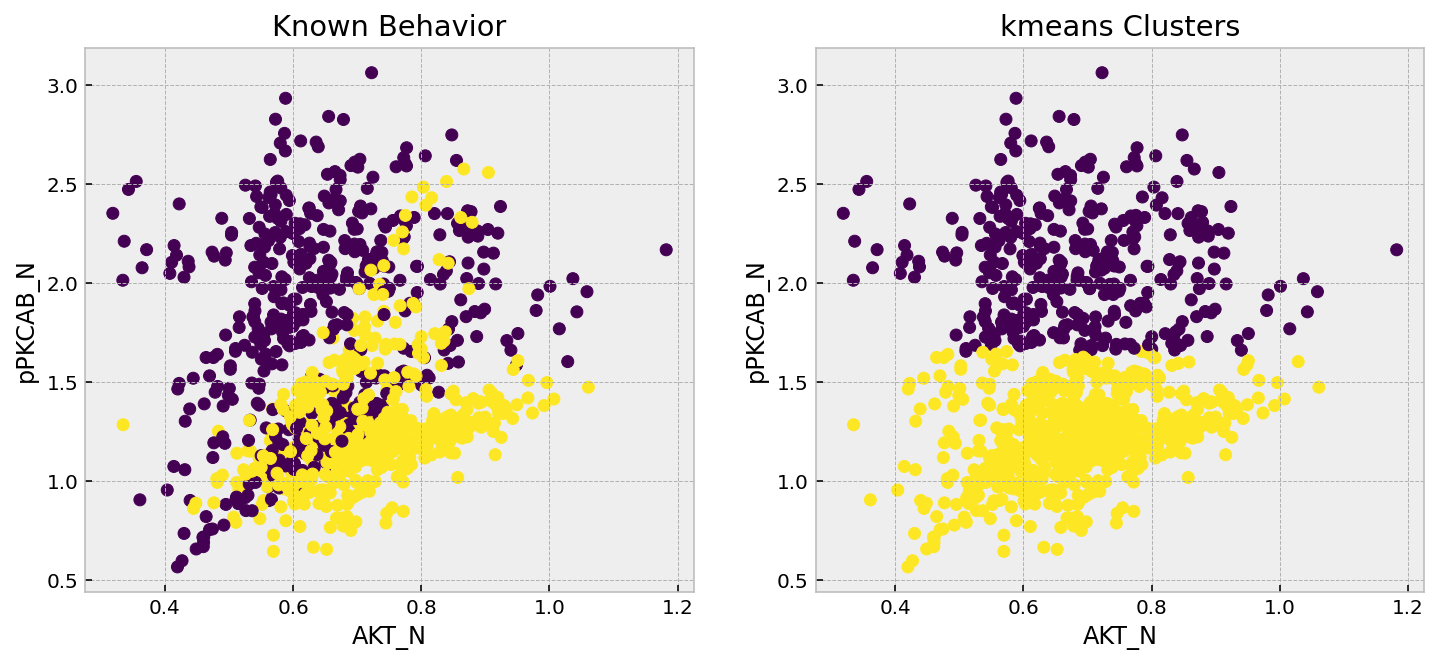

In [84]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=behaviorLabels)
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('Known Behavior');
plt.subplot(1,2,2)
plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=clusterLabels)
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('kmeans Clusters');

Summarizing $k$-means clustering with *sklearn*

In [85]:
model = KMeans(n_clusters=2)
model.fit(X)
clusterLabels = model.predict(X)

A bit more concise...

In [86]:
model = KMeans(n_clusters=2)
clusterLabels = model.fit_predict(X)

Stringing methods together...

In [87]:
clusterLabels = KMeans(n_clusters=2).fit(X).predict(X)

A bit more concise...

In [88]:
clusterLabels = KMeans(n_clusters=2).fit_predict(X)

What can we predict about the mice based solely on expression of APP_N andd SOD1_N?

In [15]:
genotypeLabels, genotypes = pd.factorize(df2['Genotype'])
treatmentLabels, treatments = pd.factorize(df2['Treatment'])
behaviorLabels, behaviors = pd.factorize(df2['Behavior'])
classLabels, classes = pd.factorize(df2['class'])

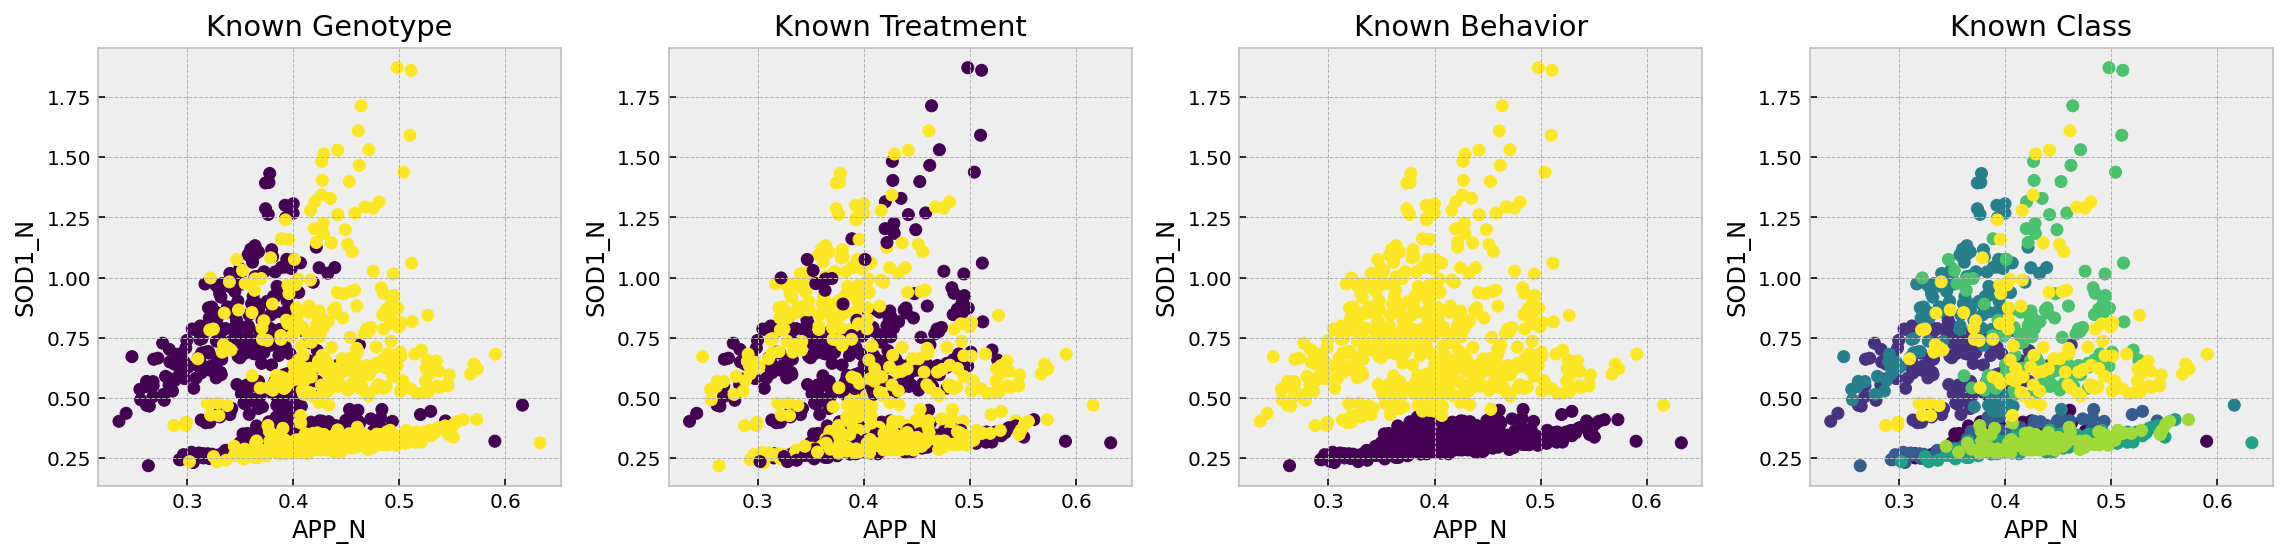

In [89]:
# colored by various catgories
ylabels = [genotypeLabels, treatmentLabels, behaviorLabels, classLabels]
ytitles = ['Genotype', 'Treatment', 'Behavior', 'Class']

plt.figure(figsize=(16,4))
for i, (labels, title) in enumerate(zip(ylabels, ytitles)):
    plt.subplot(1,4,i+1)
    plt.scatter(df2['APP_N'], df2['SOD1_N'], c=labels)
    plt.xlabel('APP_N')
    plt.ylabel('SOD1_N')
    plt.title('Known ' + title)
    plt.legend()
plt.tight_layout();

# Exercise

Use $k$-means to generate 4 and 8 clusters based on APP_N vs. SOD1_N expression levels.

Store the resulting cluster IDs in the variables `labels4` and `labels8`.

In [27]:
X = df2[['APP_N', 'SOD1_N']]

...
labels4 = ...

...
labels8 = ...

# see next cell for plot of results

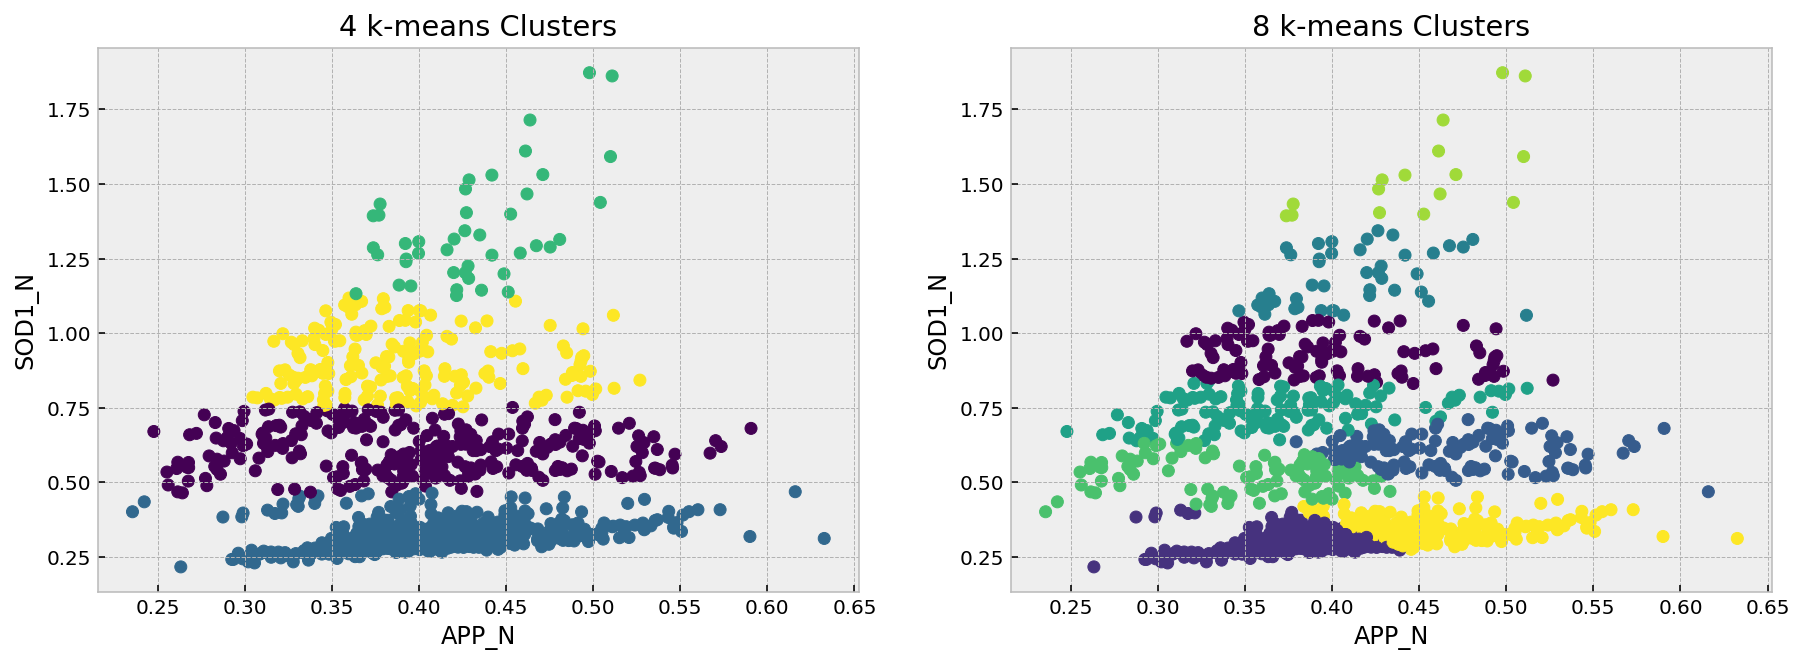

In [28]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=labels4)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('4 k-means Clusters');
plt.subplot(1,2,2)
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=labels8)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('8 k-means Clusters');

$k$-means requires you to specify the number of clusters up front.

But how many should you choose?

# Silhouette Score

Silhouette Score = (b-a) / max(a,b)

* a: average distance between each point within a cluster
* b: average distance between clusters

Ranges from -1 (clusters poorly separated) to +1 (clusters well separated)

![](images/silhouette-score.jpeg)

In [90]:
from sklearn.metrics import silhouette_score

X = df2[['APP_N', 'SOD1_N']]
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

silhouette_score(X, labels)

0.5758443700359002

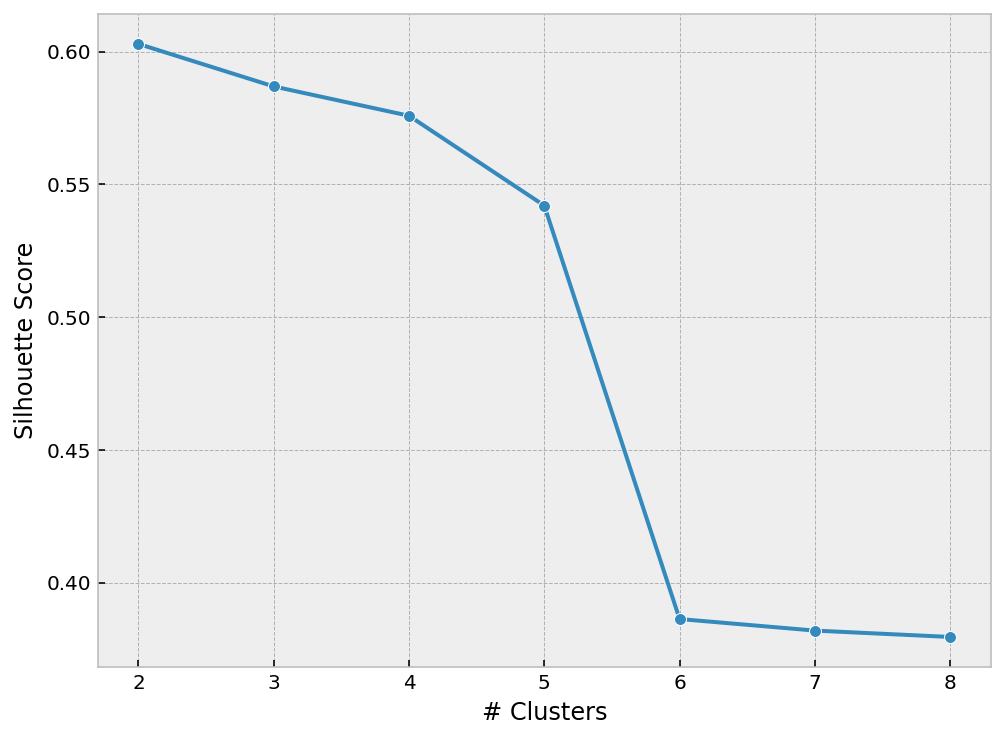

In [94]:
n_clusters = np.arange(2, 9)
silhouette_scores = np.zeros(n_clusters.shape)

for i, n in enumerate(n_clusters):
    labels = KMeans(n_clusters=n, random_state=0).fit_predict(X)
    silhouette_scores[i] = silhouette_score(X, labels)

plt.plot(n_clusters, silhouette_scores, 'o-')
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score');

Choose the number of clusters with the maximum silhouette score.

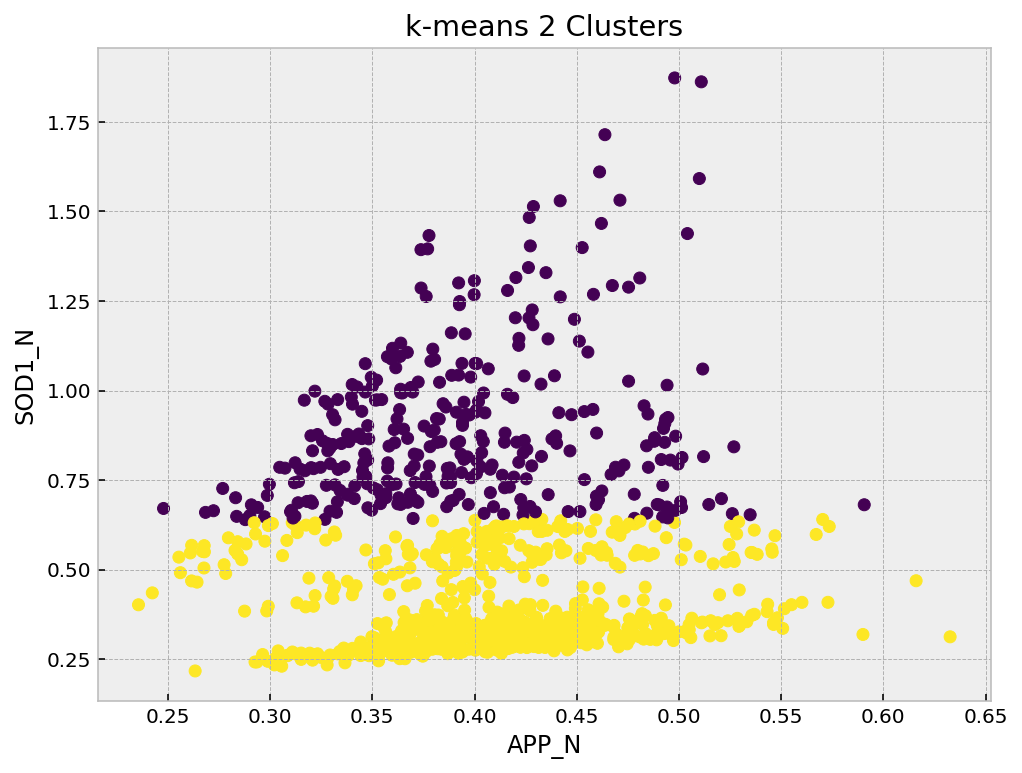

In [93]:
labels = KMeans(n_clusters=2, random_state=0).fit_predict(X)

plt.scatter(df2['APP_N'], df2['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title(f'k-means 2 Clusters');

$k$-means is meant for clusters that approximate round blobs. For anything else you'll likely need a different algorithm.

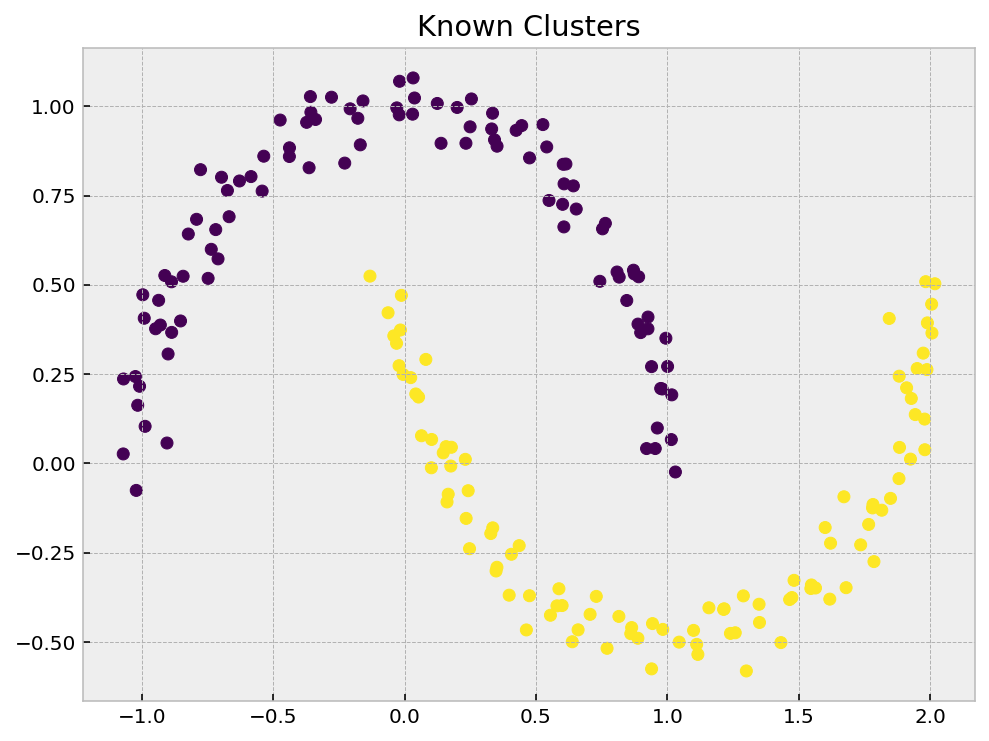

In [29]:
from sklearn.datasets import make_moons

moons, knownLabels = make_moons(200, noise=.05, random_state=0)

plt.scatter(moons[:,0], moons[:,1], c=knownLabels);
plt.title('Known Clusters');

In [30]:
clusterLabels = KMeans(n_clusters=2).fit_predict(moons)

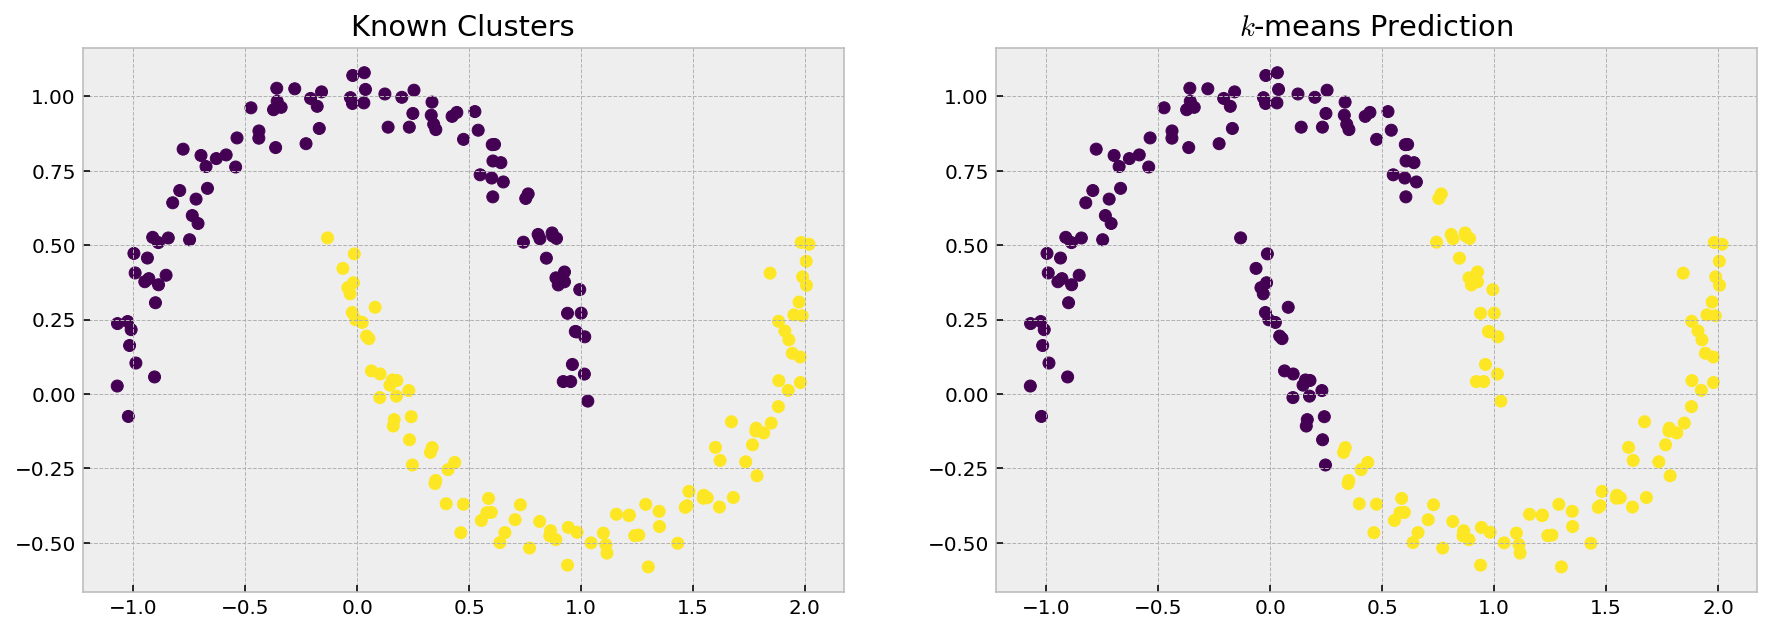

In [31]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(moons[:,0], moons[:,1], c=knownLabels)
plt.title('Known Clusters')
plt.subplot(1,2,2)
plt.scatter(moons[:,0], moons[:,1], c=clusterLabels)
plt.title('$k$-means Prediction');

Other clustering algorithms may be better suited to this type of data.

In [32]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
clusterLabels = model.fit_predict(moons)

/Users/marcel/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


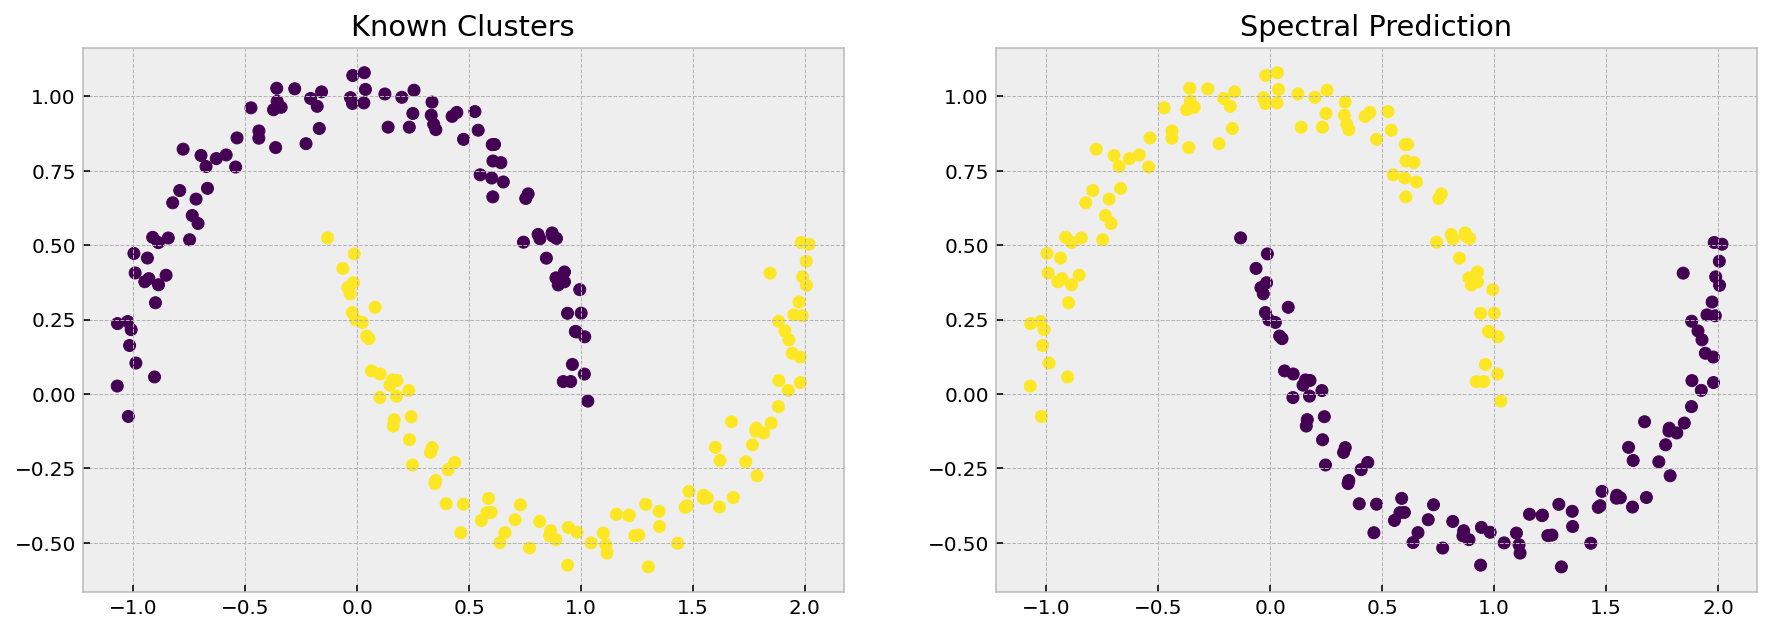

In [33]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(moons[:,0], moons[:,1], c=knownLabels)
plt.title('Known Clusters')
plt.subplot(1,2,2)
plt.scatter(moons[:,0], moons[:,1], c=clusterLabels)
plt.title('Spectral Prediction');

### No clustering algorithm is perfect for everything. You'll have to assess the pros and cons based on your data.

Here are examples of how several algorithms perform on various types of data.

Some handy info on these methods at https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

Code at https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![clustering algorithms](images/sphx_glr_plot_cluster_comparison_0011.png "Clustering Algorithms")

# Mean-Shift clustering

1. Start at a random point and specify a radius around that point.
2. Move to the mean of all the points within a specified radius.
3. Repeat 1-2 until converged (point no longer moves).

![mean-shift single window](images/mean-shift_single_window.gif "Mean-Shift Single Window")

Mean-Shift with multiple clusters

* For multiple clusters, start with a grid of points spaced over the entire data.
* Points that converge to locations within their radii are merged.
* Thus, you don't have to specify the numer of clusters, the algorithm will attempt to find the optimal number.
* !!! However, results depend on the selected radius.

![mean-shift many windows](images/mean-shift_many_windows.gif "Mean-Shift Many Windows")

Pros

* Will automatically find the optimal number of clusters.

Cons

* Results highly dependent on the specified search radius.

In [35]:
from sklearn.cluster import MeanShift

X = df2[['APP_N', 'SOD1_N']]

model = MeanShift()
model.fit(X)
clusterLabels = model.predict(X)

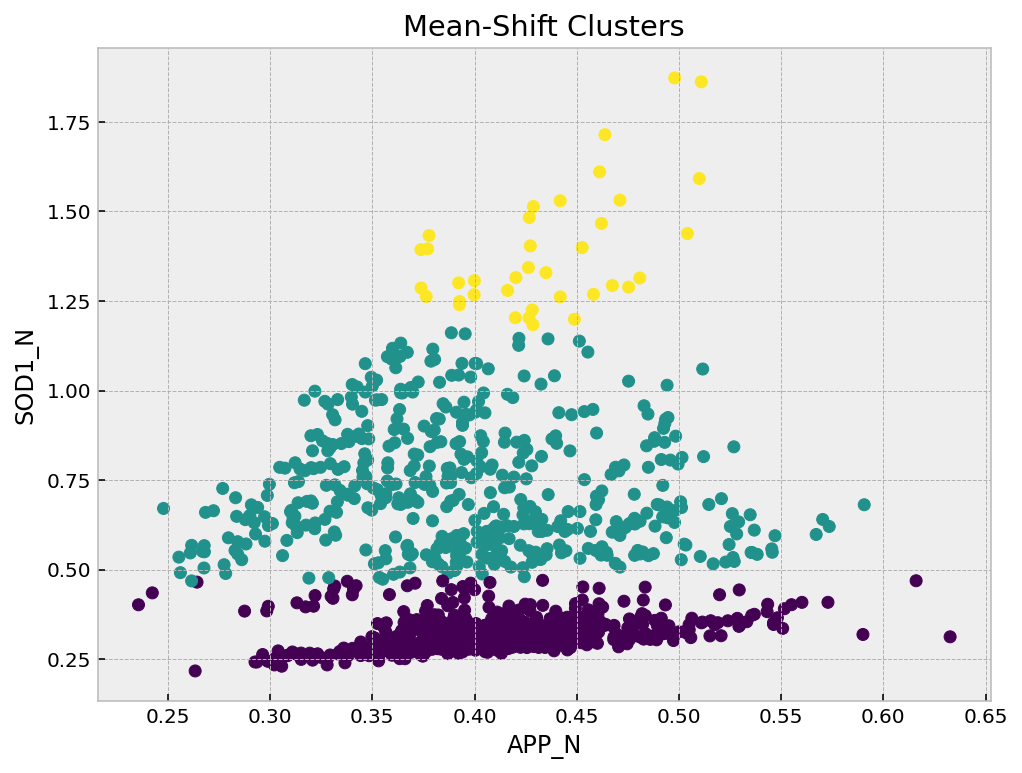

In [36]:
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Mean-Shift Clusters');

Starting clusters in a uniform grid spaced over the data rather than starting with each data point in its own cluster can be significantly faster for larger datasets

In [37]:
%%timeit
# start with each data point as its own cluster
model = MeanShift()
cluserLabels = model.fit_predict(X)

4.2 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%timeit
# start with uniform grid of clusters spread over data points
model = MeanShift(bin_seeding=True)
cluserLabels = model.fit_predict(X)

198 ms ± 7.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Exercise

Explore changing the radius (bandwidth).

Try setting the bandwidth to either 0.1 or 0.2 and see how this affects your results.

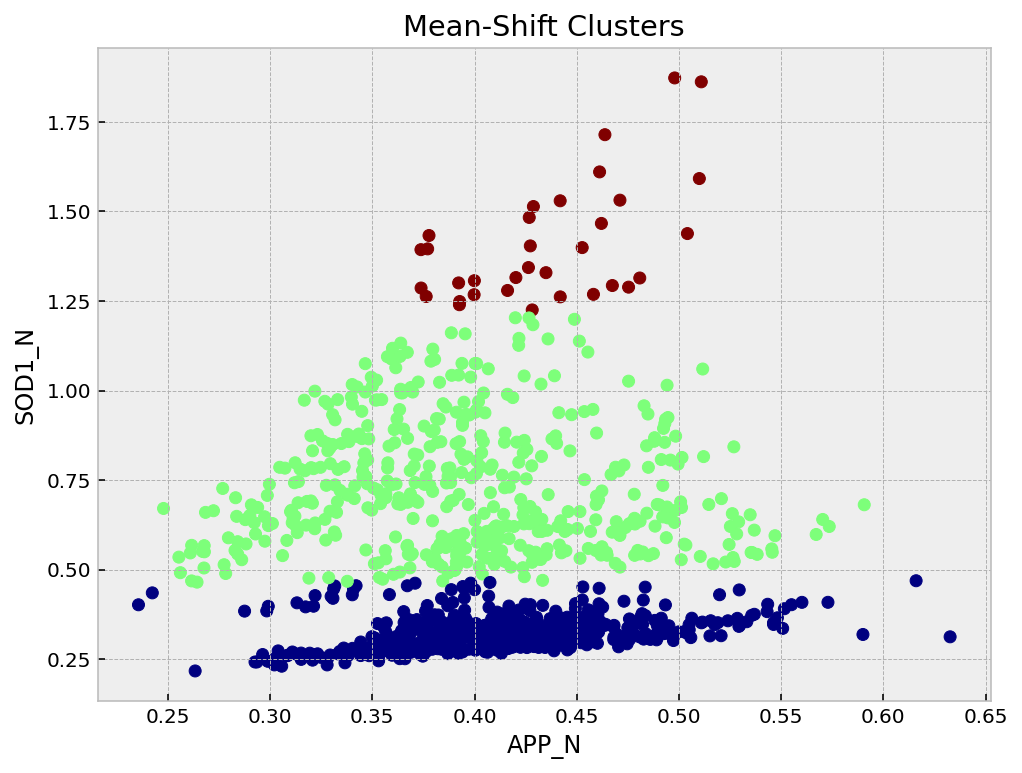

In [48]:
model = MeanShift(bandwidth=0.15, bin_seeding=True)
clusterLabels = model.fit_predict(X)

plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels, cmap='jet')
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Mean-Shift Clusters');

Estimating the radius (bandwidth) to use based on pairwise distances in the data.

In [49]:
from sklearn.cluster import estimate_bandwidth

# bandwidth estimated from 20% quantile of all pairwise distances
bandwidth = estimate_bandwidth(X, quantile=0.2)
bandwidth

0.1381093658960041

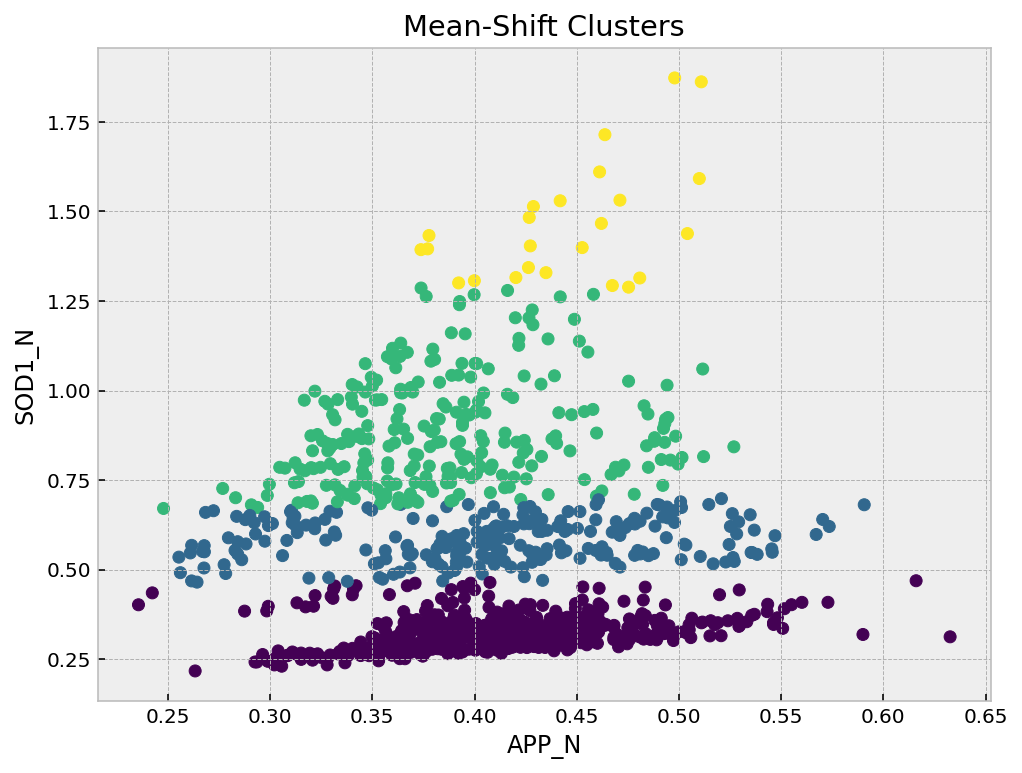

In [50]:
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clusterLabels = model.fit_predict(X)

plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Mean-Shift Clusters');

Which bandwidth is best?

You can use a scoring metric like Silhouette score to evaluate how good various bandwidths are.

In [108]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

X = df2[['APP_N', 'SOD1_N']]

bandwidths = np.arange(0.05, 0.5, 0.05)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for r in bandwidths:
    labels = MeanShift(bandwidth=r, bin_seeding=True).fit_predict(X)
    if len(np.unique(labels)) == 1:
        break
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

bandwidths = bandwidths[:len(silhouette_scores)]

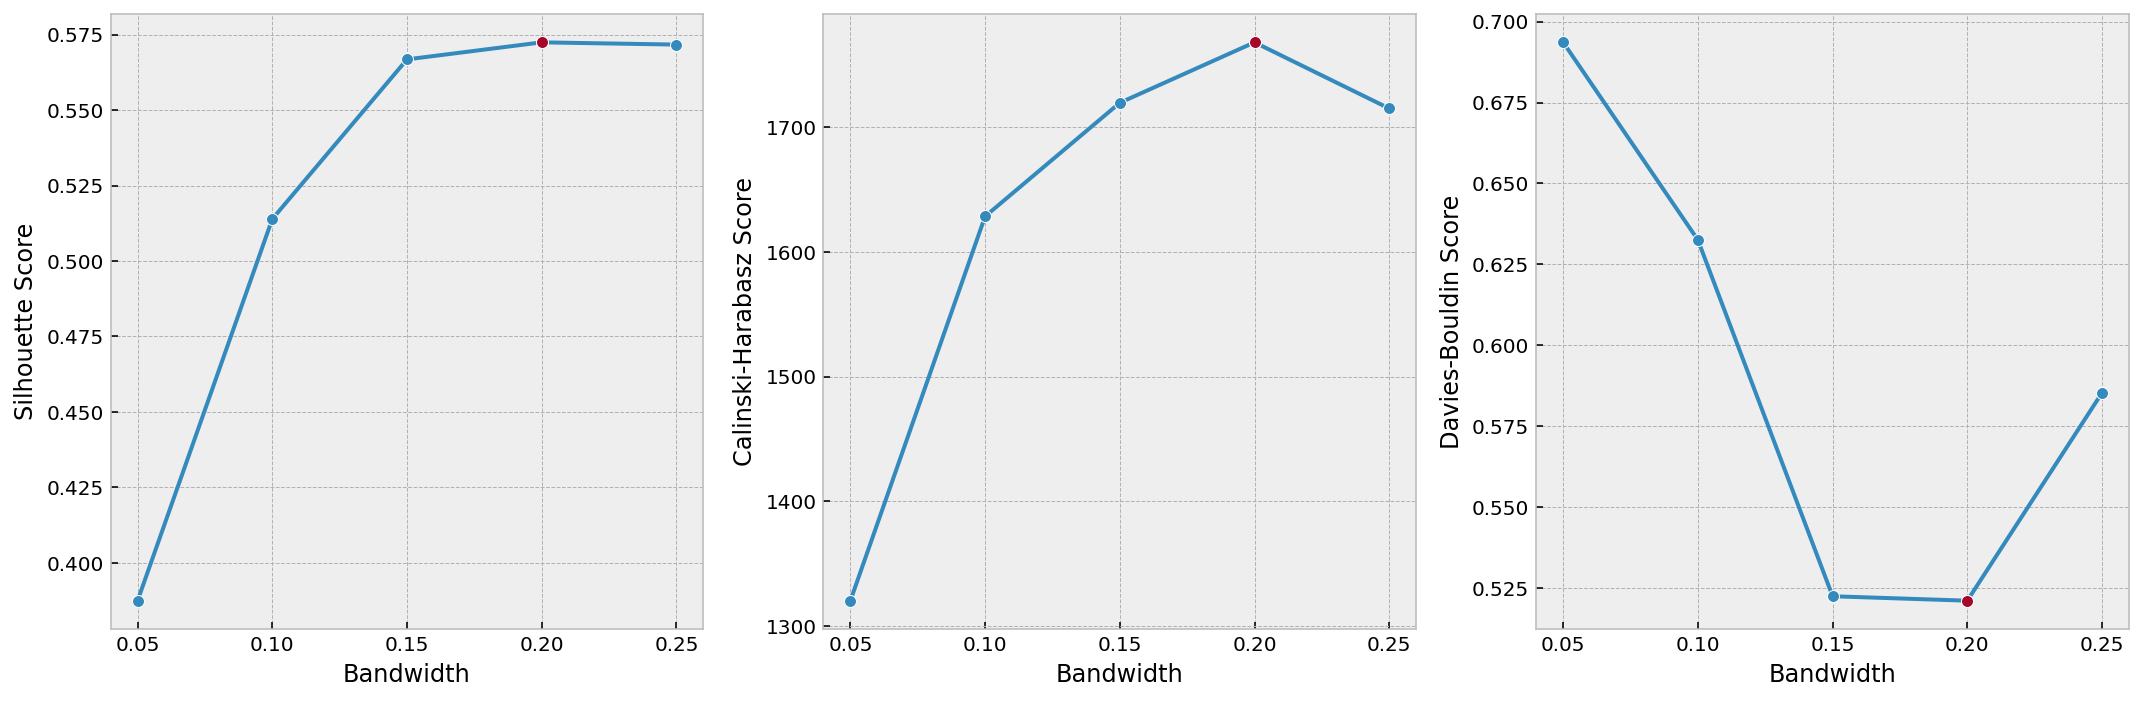

In [110]:
# bandwidth vs. scores
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.plot(bandwidths, silhouette_scores, 'o-', label='silhouette')
best_ind = np.argmax(silhouette_scores)
plt.plot(bandwidths[best_ind], silhouette_scores[best_ind], 'o-')
plt.xticks(bandwidths)
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.subplot(132)
plt.plot(bandwidths, calinski_harabasz_scores, 'o-', label='calinski-harabasz')
best_ind = np.argmax(calinski_harabasz_scores)
plt.plot(bandwidths[best_ind], calinski_harabasz_scores[best_ind], 'o-')
plt.xticks(bandwidths)
plt.xlabel('Bandwidth')
plt.ylabel('Calinski-Harabasz Score')
plt.subplot(133)
plt.plot(bandwidths, davies_bouldin_scores, 'o-', label='davies-bouldin')
best_ind = np.argmin(davies_bouldin_scores)
plt.plot(bandwidths[best_ind], davies_bouldin_scores[best_ind], 'o-')
plt.xticks(bandwidths)
plt.xlabel('Bandwidth')
plt.ylabel('Davies-Bouldin Score')
# plt.legend()
plt.tight_layout();

# Gaussian Mixture Model (GMM)

* Need to specify the number of clusters.
* Unlike $k$-means which is primarily for round (e.g. circular) blobs, GMMs can fit eliptical blobs.

![GMM](images/gmm.gif "GMM")

GMM clusters can overlap.

![overlap clusters](images/overlapping_gaussians.png "Overlapping Clusters")

Each data point has a probability to belong to each cluster.

![overlap GMM](images/overlapping_gaussians2.png "Overlapping GMM")

In [52]:
from sklearn.mixture import GaussianMixture

X = df2[['APP_N', 'SOD1_N']]

model = GaussianMixture(n_components=4)
clusterLabels = model.fit_predict(X)

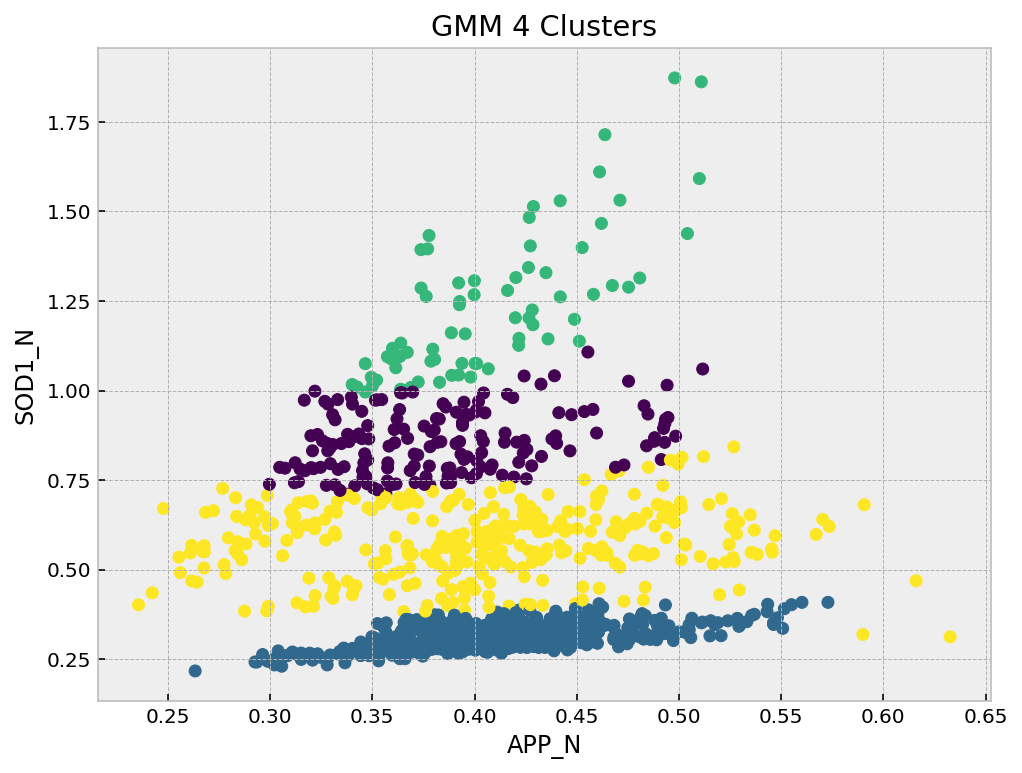

In [54]:
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('GMM 4 Clusters');

Probability of each data point belonging to each custer.

In [55]:
proba = model.predict_proba(X)

proba.round(3)

array([[0.   , 0.945, 0.   , 0.055],
       [0.   , 0.982, 0.   , 0.018],
       [0.   , 0.98 , 0.   , 0.02 ],
       ...,
       [0.256, 0.   , 0.119, 0.625],
       [0.41 , 0.   , 0.086, 0.504],
       [0.765, 0.   , 0.012, 0.223]])

# GMMs: How many components to choose?

In [56]:
X = df2[['APP_N', 'SOD1_N']]

model = GaussianMixture(n_components=8)
clusterLabels = model.fit_predict(X)

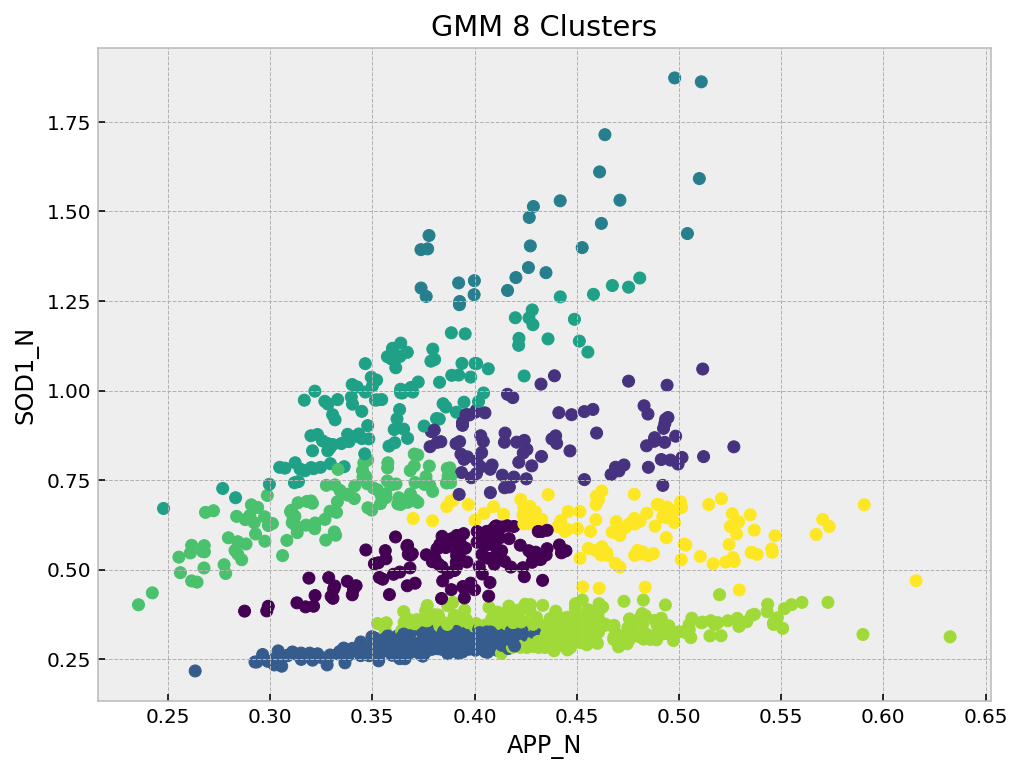

In [57]:
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('GMM 8 Clusters');

### Objective functions such as Bayesian Information Criterion (BIC)

### $BIC = ln(n) * k - 2 * ln(L)$

* $k$ = number of model parameters (Gaussian centers, standard deviations, and rotations)
* $n$ = number of data points
* $L$ = likelihood of the model given the data

In [59]:
n_components = np.arange(1, 21)
BIC_scores = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    model = GaussianMixture(n_components=n, random_state=0)
    model.fit(X)
    BIC_scores[i] = model.bic(X)

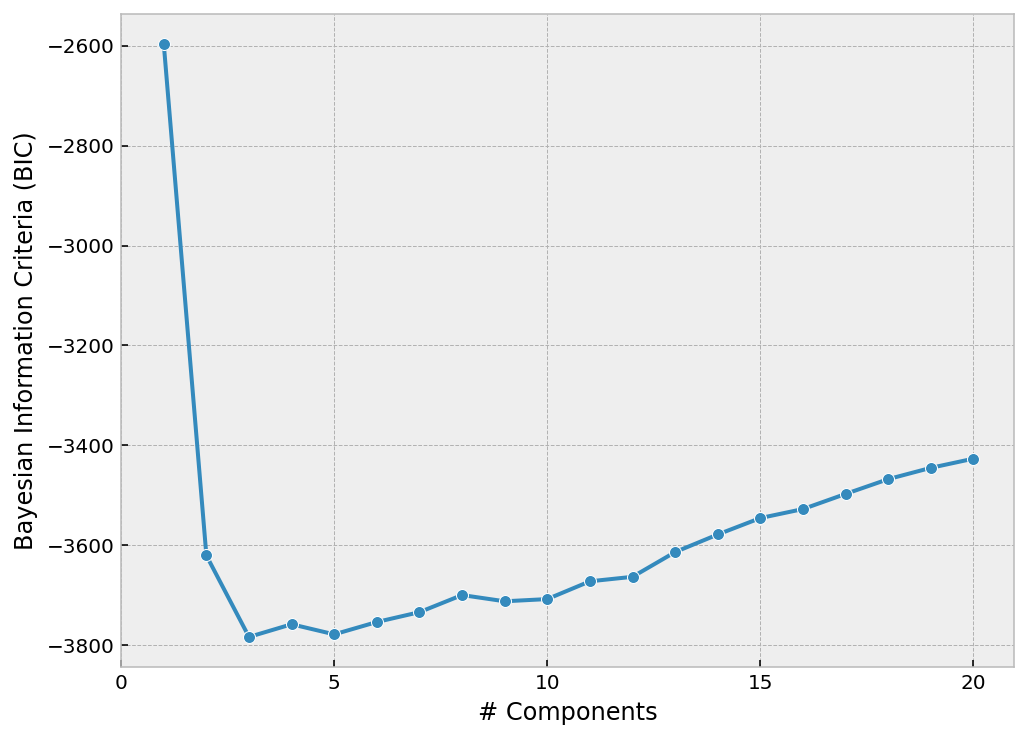

In [112]:
plt.plot(n_components, BIC_scores, 'o-')
plt.xticks(range(0, 21, 5))
plt.xlabel('# Components');
plt.ylabel('Bayesian Information Criteria (BIC)');

In [61]:
best_index = np.argmin(BIC_scores)
best_n = n_components[best_index]
best_n

3

In [62]:
model = GaussianMixture(n_components=best_n)
clusterLabels = model.fit_predict(X)

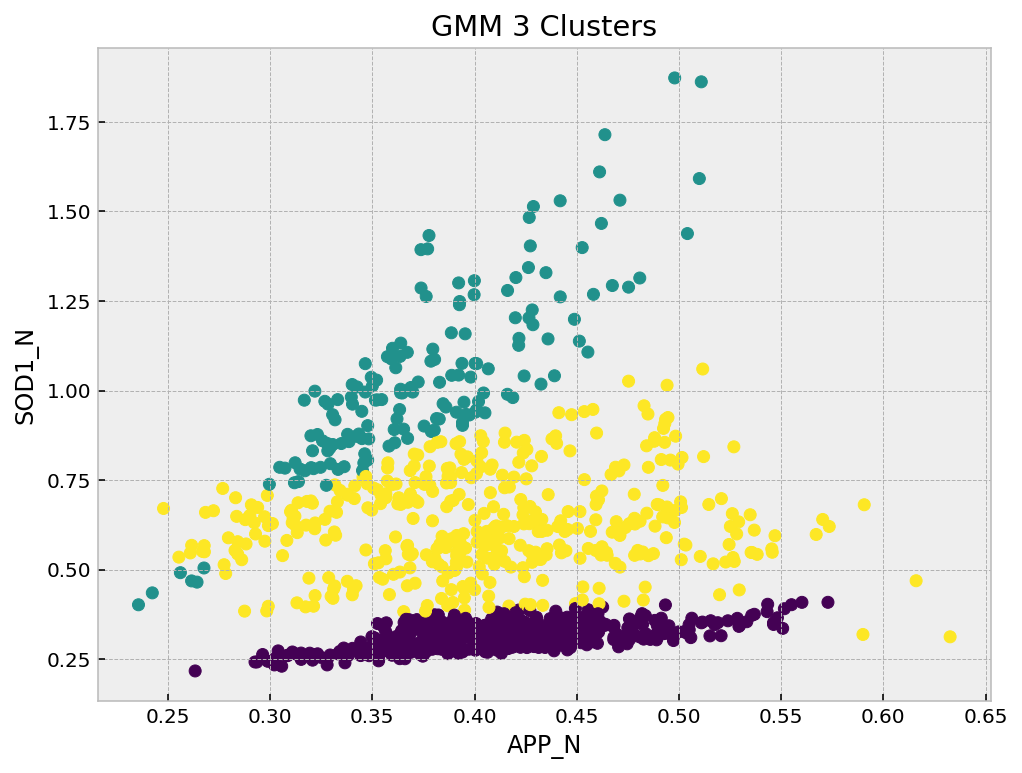

In [64]:
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title(f'GMM {best_n} Clusters');

# Exercise

Use a GMM and BIC to determine the number of clusters to use in the data below.

Plot the data colored by the predicted cluster.

In [ ]:
X = df2[['AKT_N', 'pPKCAB_N']]

# determine number of GMM clusters to use
...
best_n = ...

# GMM clustering
...
clusterLabels = ...

# plot results
plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=clusterLabels, cmap='jet')
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title(f'GMM {best_n} Clusters');

---
# Heirarchical Agglomerative clustering

Start with all data points in separate clusters and iteravely combine the closest clusters together. 

![HAC](images/hac.gif "HAC")

* **affinity**: How to compute distances.
    * **euclidean** is the standard measure of distance you are all familiar with.
    * **manhattan** is distance on a grid like walking city blocks
    * etc.
* **linkage**: How to decide wich two clusters to merge next. Always choose to merge the two clusters that minimize the linkage.
    * **ward** minimizes the variance of the clusters being merged.
    * **average** uses the average of the distances of each observation of the two sets.
    * **complete** or maximum linkage uses the maximum distances between all observations of the two sets.
    * **single** uses the minimum of the distances between all observations of the two sets.

In [67]:
from sklearn.cluster import AgglomerativeClustering

X = df2[['APP_N', 'SOD1_N']]

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusterLabels = model.fit_predict(X)

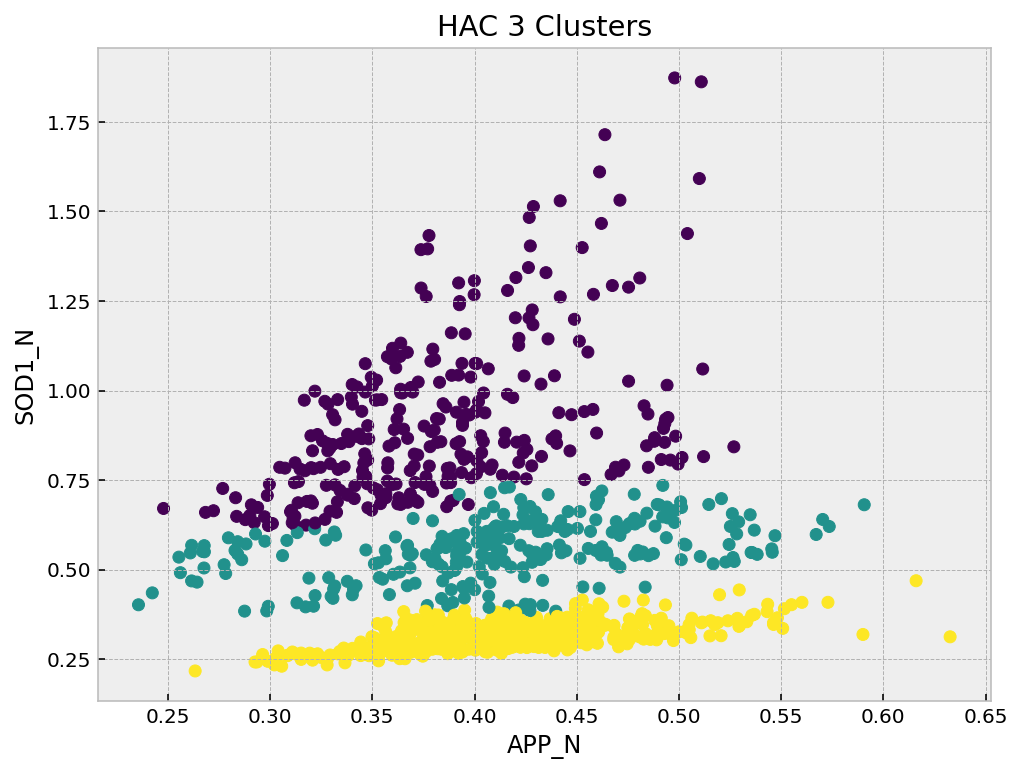

In [68]:
plt.scatter(df2['APP_N'], df2['SOD1_N'], c=clusterLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title(f'HAC {model.n_clusters} Clusters');

# Exercise

Cluster the moons data using HAC with 2 clusters, 'euclidean' affinity and either 'single' or 'ward' linkage. Plot your results. Do the different linkages make a difference?

In [ ]:
moons, knownLabels = make_moons(200, noise=.05, random_state=0)
X = moons

model_single = ...
clusterLabels_single = ...

model_ward = ...
clusterLabels_ward = ...

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(moons[:,0], moons[:,1], c=clusterLabels_single)
plt.title('Single Linkage')
plt.subplot(1,2,2)
plt.scatter(moons[:,0], moons[:,1], c=clusterLabels_ward)
plt.title('Ward Linkage');

# Dendrogram

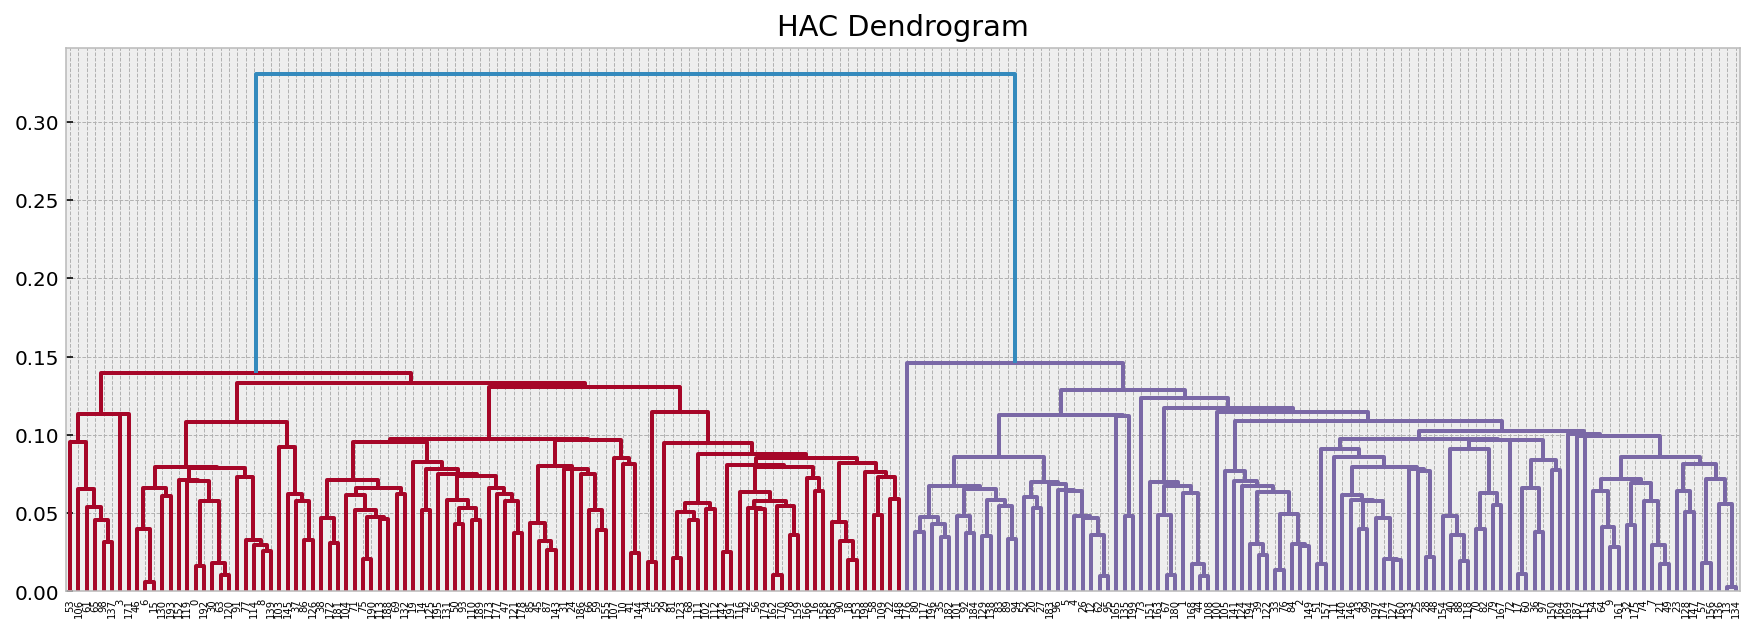

In [69]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=[15,5])
sch.dendrogram(sch.linkage(moons, method='single'));
plt.title('HAC Dendrogram');

---
# Density-Based Spatial Clustering (DBSCAN)

![DBSCAN](images/dbscan.gif "DBSCAN")

In [70]:
from sklearn.cluster import DBSCAN

moons, knownLabels = make_moons(200, noise=.05, random_state=0)
X = moons

model = DBSCAN(eps=0.3, min_samples=5)
clusterLabels = model.fit_predict(X)

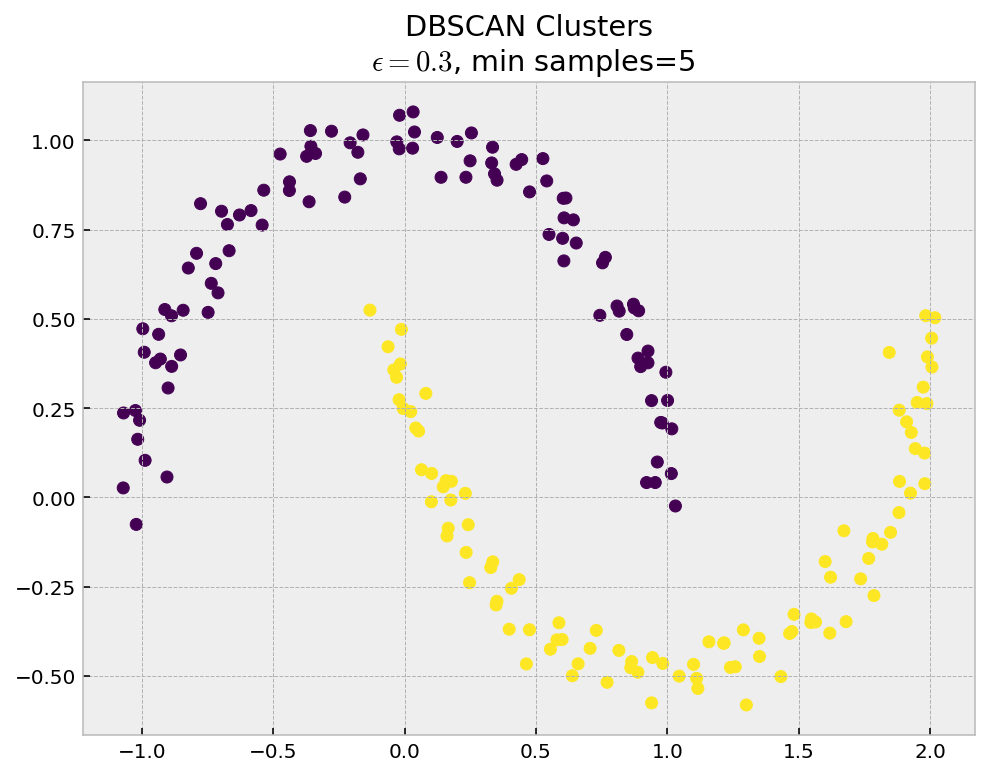

In [71]:
plt.scatter(moons[:,0], moons[:,1], c=clusterLabels);
plt.title('DBSCAN Clusters\n $\epsilon=0.3$, min samples=5');

Cluster size (and number of clusters ) depends on $\epsilon$.

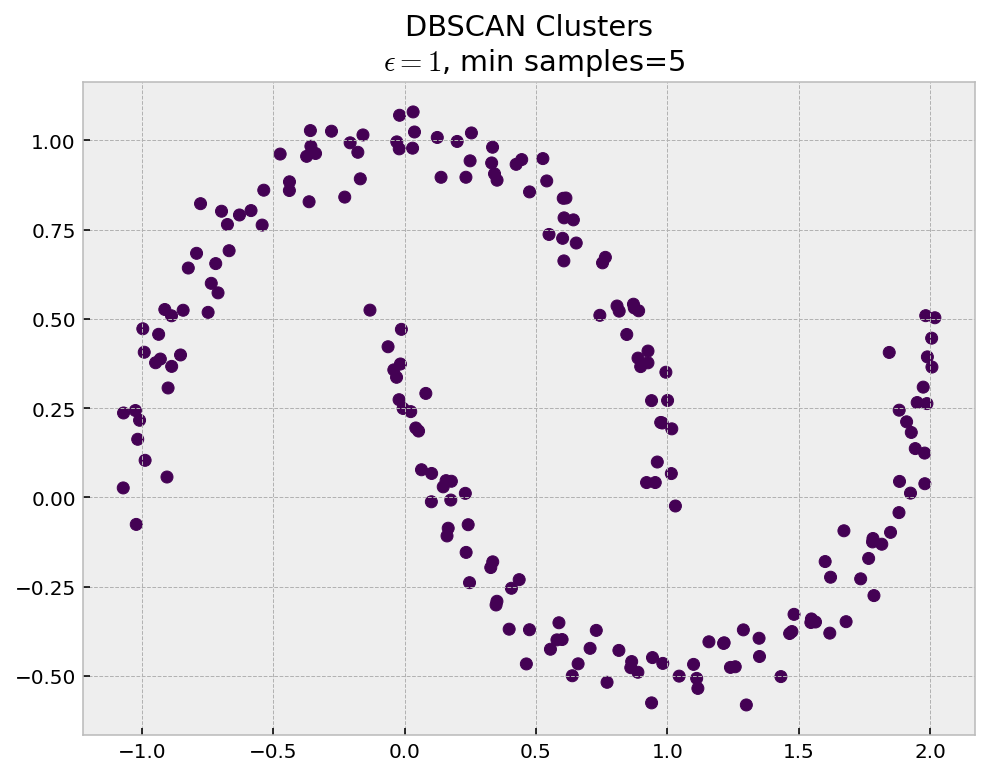

In [72]:
model = DBSCAN(eps=1, min_samples=5)
clusterLabels = model.fit_predict(X)

plt.scatter(moons[:,0], moons[:,1], c=clusterLabels);
plt.title('DBSCAN Clusters\n $\epsilon=1$, min samples=5');

Cluster size (and number of clusters ) depends on $\epsilon$.

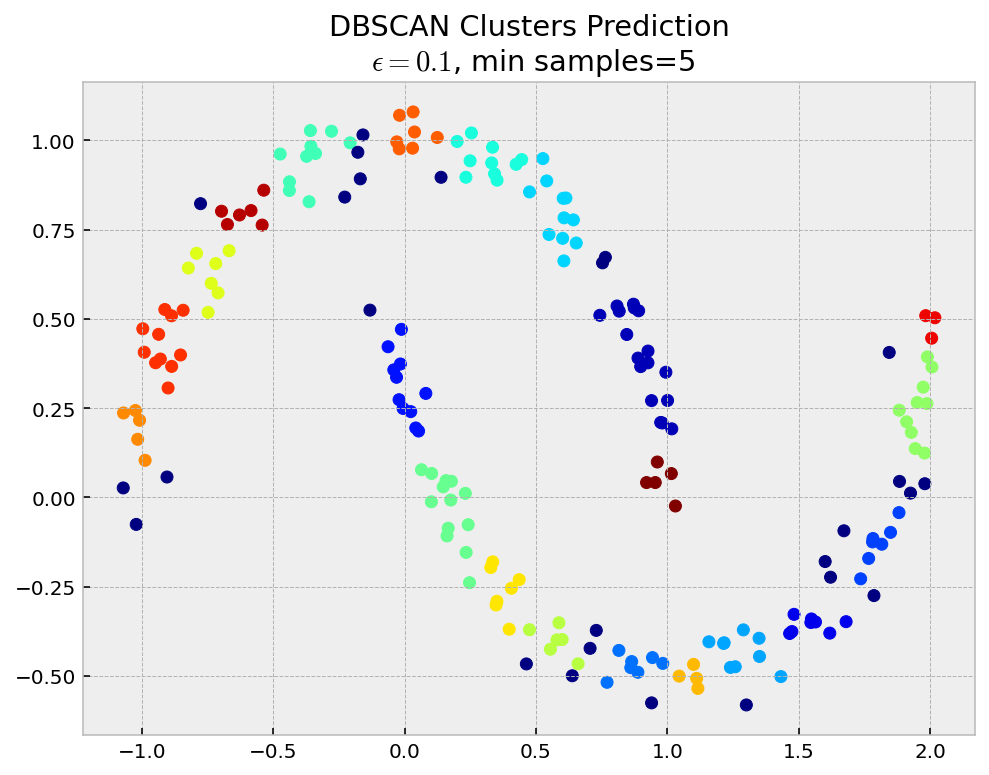

In [73]:
model = DBSCAN(eps=0.1, min_samples=5)
clusterLabels = model.fit_predict(X)

plt.scatter(moons[:,0], moons[:,1], c=clusterLabels, cmap='jet')
plt.title('DBSCAN Clusters Prediction\n $\epsilon=0.1$, min samples=5');

# Exercise

Use DBSCAN with $\epsilon = 0.1$ and a minimum of 10 samples to cluster the AKT_N vs. pPKCAB_N expression levels.

Plot the data colored by the predicted cluster.

In [ ]:
X = df2[['AKT_N', 'pPKCAB_N']]

model = ...
clusterLabels = ...

plt.scatter(df2['AKT_N'], df2['pPKCAB_N'], c=clusterLabels, cmap='jet')
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('DBSCAN');